In [2]:
# Import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import KNNImputer
import os
import re


In [3]:
tsv_directory  = "./dataset/train/boxes_transcripts_labels" # initalizing path of train dir in a variable
dirlist = os.listdir(tsv_directory )

# Total no of files
print(len(dirlist))

600


In [4]:
columns = [
    'employerName',
    'employerAddressStreet_name',
    'employerAddressCity',
    'employerAddressState',
    'employerAddressZip',
    'einEmployerIdentificationNumber',
    'employeeName',
    'ssnOfEmployee',
    'box1WagesTipsAndOtherCompensations',
    'box2FederalIncomeTaxWithheld',
    'box3SocialSecurityWages',
    'box4SocialSecurityTaxWithheld',
    'box16StateWagesTips',
    'box17StateIncomeTax',
    'taxYear']

In [5]:
# Initialize an empty list to store dataframes
dflist = []

# Iterate through each TSV file in the directory
for file in dirlist:
        tsv_file_path  = os.path.join(tsv_directory , file)       
        # Read the CSV file into a DataFrame
        df = pd.read_csv(tsv_file_path, header=None)
        df.columns = ['start_index', 'end_index', 'x_top_left', 'y_top_left', 'x_bottom_right', 'y_bottom_right', 'transcript', 'field']

        # Filtering out rows with 'field' equal to 'OTHER'
        df = df[df['field'] != 'OTHER']

        # Select and group relevant columns
        df = df[['field', 'transcript']].groupby('field')['transcript'].apply(' '.join).reset_index()

        # Pivot the DataFrame and fill NaN values
        df = df.pivot_table(index=None, columns='field', values='transcript', aggfunc=' '.join, fill_value=None)

        # Reorder columns based on the desired order
        df = df.reindex(columns=columns)

        # Append the resulting row to the list
        dflist.append(list(df.iloc[0]))

        
rename_cols = [
    'employerName',
    'employerAddressStreet_name',
    'employerAddressCity',
    'employerAddressState',
    'employerAddressZip',
    'einEmployerIdentificationNumber',
    'employeeName',
    'ssnOfEmployee',
    'WagesTipsAndOtherCompensations',
    'FederalIncomeTaxWithheld',
    'SocialSecurityWages',
    'SocialSecurityTaxWithheld',
    'StateWagesTips',
    'StateIncomeTax',
    'taxYear']
        
# Create the final DataFrame
train_df = pd.DataFrame(dflist, columns=rename_cols)

# Print the final DataFrame
train_df.head()


,employerName,employerAddressStreet_name,employerAddressCity,employerAddressState,employerAddressZip,einEmployerIdentificationNumber,employeeName,ssnOfEmployee,WagesTipsAndOtherCompensations,FederalIncomeTaxWithheld,SocialSecurityWages,SocialSecurityTaxWithheld,StateWagesTips,StateIncomeTax,taxYear
0,Collins-Saunders and Sons,9652 Scott Groves Apt. 116,Rodriguezmouth,NE,70838-1080,37-3493491,Stephanie Dawson,720-74-9502,41669. 07,11182.93,53826. 13,4117 . 7,20287. 85,1690 . 44,2019
1,and Sons,364 Ariel Courts,Amandatown,AK,12316-9561,Flores-Robinson,John Simmons,380-62-5767,80470 . 88,24033. 1,74643.59,5710 .23,38337. 36,4822 . 74,2019
2,Wheeler Group Inc,6332 Buchanan Highway,West Christopher,FL,02255-5969,71-4914665,James Vaughn,840-98-5933,144945 . 07,25188 . 98,102055 . 28,7807.23,. 74072 96,4178.31,2019
3,Scott PLC Ltd,90423 Tiffany Village Apt. 020,North Tammie,NE,95190-6163,99-2710525,Cynthia Calderon,051-70-0598,229346 . 09,25185 . 41,237569. 24,18174 . 05,106698 . 62,7526 . 65,2019
4,French 104 and See,22463 moreno Stream,Victoriabury,FA,90146-9103,NaN,Katie Hensley,$35-36-3912,49239.09,10471-76,NaN,1012.09,39034.35,2306.07,2019


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   employerName                     560 non-null    object
 1   employerAddressStreet_name       568 non-null    object
 2   employerAddressCity              562 non-null    object
 3   employerAddressState             552 non-null    object
 4   employerAddressZip               560 non-null    object
 5   einEmployerIdentificationNumber  541 non-null    object
 6   employeeName                     565 non-null    object
 7   ssnOfEmployee                    466 non-null    object
 8   WagesTipsAndOtherCompensations   519 non-null    object
 9   FederalIncomeTaxWithheld         519 non-null    object
 10  SocialSecurityWages              511 non-null    object
 11  SocialSecurityTaxWithheld        504 non-null    object
 12  StateWagesTips                   509

We can see that every columns is of Object Datatype

In [7]:
# dropping unnecessary columns
cols_to_drop =['employerName','employerAddressStreet_name','employerAddressZip','einEmployerIdentificationNumber',
              'employeeName','ssnOfEmployee']
train_df.drop(cols_to_drop,axis=1,inplace=True)

In [8]:
train_df.head()

,employerAddressCity,employerAddressState,WagesTipsAndOtherCompensations,FederalIncomeTaxWithheld,SocialSecurityWages,SocialSecurityTaxWithheld,StateWagesTips,StateIncomeTax,taxYear
0,Rodriguezmouth,NE,41669. 07,11182.93,53826. 13,4117 . 7,20287. 85,1690 . 44,2019
1,Amandatown,AK,80470 . 88,24033. 1,74643.59,5710 .23,38337. 36,4822 . 74,2019
2,West Christopher,FL,144945 . 07,25188 . 98,102055 . 28,7807.23,. 74072 96,4178.31,2019
3,North Tammie,NE,229346 . 09,25185 . 41,237569. 24,18174 . 05,106698 . 62,7526 . 65,2019
4,Victoriabury,FA,49239.09,10471-76,NaN,1012.09,39034.35,2306.07,2019


In [9]:
# preprocessing the numeric columns and converting them into float values

num_columns = ['WagesTipsAndOtherCompensations', 'FederalIncomeTaxWithheld', 'SocialSecurityWages',
               'SocialSecurityTaxWithheld', 'StateWagesTips', 'StateIncomeTax']


def preprocess(string):
    
     # If null value is there then return null
        if string.lower() in ['nan', 'nan']:
            return float('nan')
        
        # Remove spaces and replace '-' with '.'
        string = string.replace(' ', '').replace('-', '.')
        
        # Use a regular expression to remove leading and trailing non-numeric characters
        string = re.sub(r'^[^0-9]*|[^0-9]*$', '', string)


        # Use a regular expression to check if the string contains only numeric characters and '.'
        if not re.match(r'^[0-9.]*$', string) or string == '':
            return np.nan

        # Check if '.' is not present take as null
        if '.' not in string:
            return float(np.nan)

        return float(string)

# Applying function on all the numeric columns 
for col in num_columns:
        train_df[col] = train_df[col].apply(lambda string: preprocess(str(string)))

# Print the final DataFrame
train_df.head()

    

,employerAddressCity,employerAddressState,WagesTipsAndOtherCompensations,FederalIncomeTaxWithheld,SocialSecurityWages,SocialSecurityTaxWithheld,StateWagesTips,StateIncomeTax,taxYear
0,Rodriguezmouth,NE,41669.07,11182.93,53826.13,4117.70,20287.85,1690.44,2019
1,Amandatown,AK,80470.88,24033.10,74643.59,5710.23,38337.36,4822.74,2019
2,West Christopher,FL,144945.07,25188.98,102055.28,7807.23,NaN,4178.31,2019
3,North Tammie,NE,229346.09,25185.41,237569.24,18174.05,106698.62,7526.65,2019
4,Victoriabury,FA,49239.09,10471.76,NaN,1012.09,39034.35,2306.07,2019


In [10]:
# Print the final DataFrame
train_df.describe()

,WagesTipsAndOtherCompensations,FederalIncomeTaxWithheld,SocialSecurityWages,SocialSecurityTaxWithheld,StateWagesTips,StateIncomeTax
count,475.000000,463.000000,469.000000,469.000000,408.000000,450.000000
mean,145072.162821,32163.476592,144944.751087,11091.494925,72361.603358,5387.630201
std,60429.678826,18938.149592,68395.484123,6624.601081,30797.491191,3184.061899
min,5718.940000,9.352120,17063.080000,276.420000,10956.000000,8.568100
25%,93506.675000,17521.975000,89656.290000,6624.000000,44865.332500,3011.177500
50%,145660.200000,27993.410000,137908.530000,10545.750000,72301.510000,4671.935000
75%,195581.690000,44213.480000,196502.250000,14936.940000,97781.982500,7198.167500
max,249641.710000,97761.360000,414913.130000,96928.060000,134026.290000,19421.530000


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   employerAddressCity             562 non-null    object 
 1   employerAddressState            552 non-null    object 
 2   WagesTipsAndOtherCompensations  475 non-null    float64
 3   FederalIncomeTaxWithheld        463 non-null    float64
 4   SocialSecurityWages             469 non-null    float64
 5   SocialSecurityTaxWithheld       469 non-null    float64
 6   StateWagesTips                  408 non-null    float64
 7   StateIncomeTax                  450 non-null    float64
 8   taxYear                         545 non-null    object 
dtypes: float64(6), object(3)
memory usage: 42.3+ KB


Now lets deal with taxYear column

In [12]:
train_df['taxYear'] = pd.to_numeric(train_df['taxYear'], errors='coerce')

<AxesSubplot:>

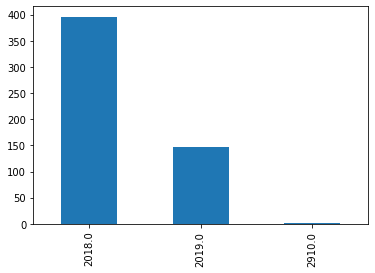

In [13]:
train_df['taxYear'].value_counts().plot(kind='bar')

There are 396 occurrences of the value is from the year 2018 which is 66% of the total data
while 147 occurrences of the value is from the year 2019
As there is one incorrect data entry we will drop the value from the data set

In [14]:
# Droping the row where 'taxYear' is equal to '2910.0'
train_df = train_df[train_df['taxYear'] != 2910]

In [15]:
# Now lets deal with the null values 
train_df.isna().sum()

employerAddressCity                37
employerAddressState               47
WagesTipsAndOtherCompensations    124
FederalIncomeTaxWithheld          136
SocialSecurityWages               130
SocialSecurityTaxWithheld         130
StateWagesTips                    191
StateIncomeTax                    149
taxYear                            56
dtype: int64

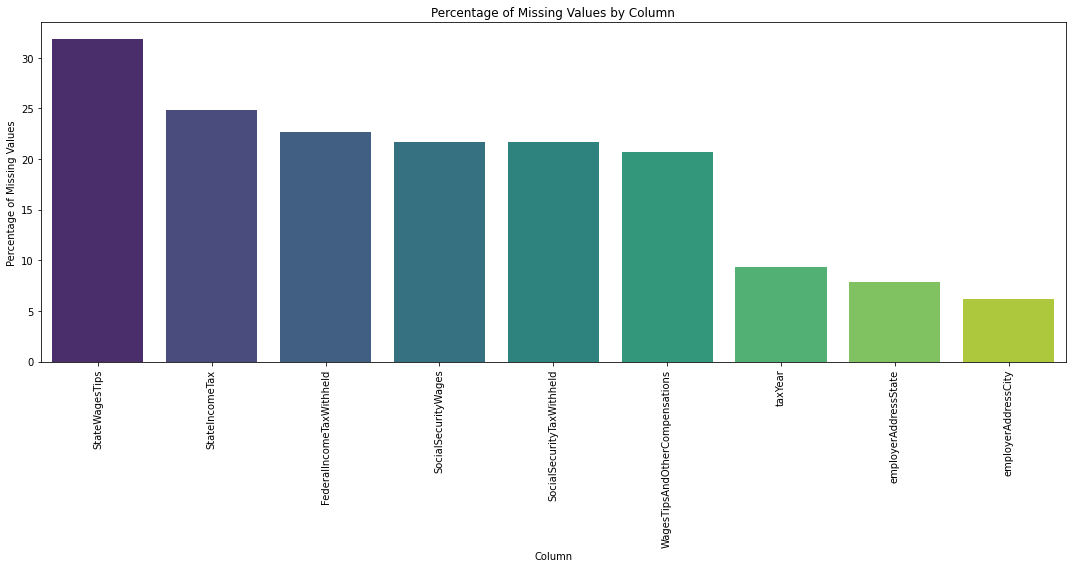

In [16]:

# Calculate the percentage of missing values for each column
missing_percent = (train_df.isnull().mean() * 100).round(2)

# Create a DataFrame to store the missing percentage
missing_df = pd.DataFrame({'Column': missing_percent.index, 'Missing Percentage': missing_percent.values})

# Sort the DataFrame by missing percentage in descending order
missing_df = missing_df.sort_values(by='Missing Percentage', ascending=False)

# Visualize the missing percentage
plt.figure(figsize=(15, 8))
sns.barplot(x='Column', y='Missing Percentage', data=missing_df, palette='viridis')
plt.xlabel('Column')
plt.ylabel('Percentage of Missing Values')
plt.title('Percentage of Missing Values by Column')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


We can infer from the above image that overall missing values is about 35 % thererfore we will replace the NaN values with the help of KNN Imputer

In [17]:
numeric  = train_df[num_columns]
numeric

,WagesTipsAndOtherCompensations,FederalIncomeTaxWithheld,SocialSecurityWages,SocialSecurityTaxWithheld,StateWagesTips,StateIncomeTax
0,41669.07,11182.93,53826.13,4117.70,20287.85,1690.44
1,80470.88,24033.10,74643.59,5710.23,38337.36,4822.74
2,144945.07,25188.98,102055.28,7807.23,NaN,4178.31
3,229346.09,25185.41,237569.24,18174.05,106698.62,7526.65
4,49239.09,10471.76,NaN,1012.09,39034.35,2306.07
...,...,...,...,...,...,...
595,58304.97,10836.76,56051.56,4287.94,NaN,1982.96
596,187638.77,63800.28,150473.68,11511.24,93928.81,8385.66
597,132137.41,34142.49,141074.23,10792.18,NaN,7161.74
598,182042.65,55164.76,234196.10,17916.00,NaN,NaN


In [19]:

for col in num_columns:
    
    # Initialize the KNNImputer with the desired number of neighbors
    imputer = KNNImputer(n_neighbors=5)
    
     # Convert the column to a 2D array-like structure
    col_2d = np.array(train_df[col]).reshape(-1, 1)

    # Impute the missing values directly on the entire DataFrame
    train_df[col] = imputer.fit_transform(col_2d)
train_df.head()

,employerAddressCity,employerAddressState,WagesTipsAndOtherCompensations,FederalIncomeTaxWithheld,SocialSecurityWages,SocialSecurityTaxWithheld,StateWagesTips,StateIncomeTax,taxYear
0,Rodriguezmouth,NE,41669.07,11182.93,53826.130000,4117.70,20287.850000,1690.44,2019.0
1,Amandatown,AK,80470.88,24033.10,74643.590000,5710.23,38337.360000,4822.74,2019.0
2,West Christopher,FL,144945.07,25188.98,102055.280000,7807.23,72361.603358,4178.31,2019.0
3,North Tammie,NE,229346.09,25185.41,237569.240000,18174.05,106698.620000,7526.65,2019.0
4,Victoriabury,FA,49239.09,10471.76,144944.751087,1012.09,39034.350000,2306.07,2019.0



*** Distplot ***


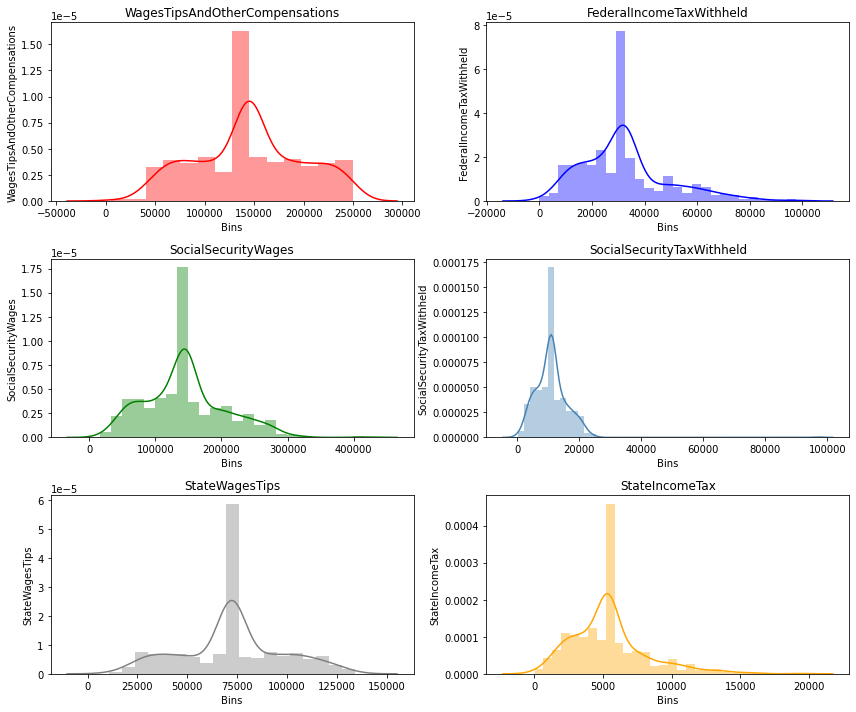

In [21]:
# boxplot
print('\n*** Distplot ***')
# colNames = numeric.columns.tolist()
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
colors=['r','b','g','steelblue','grey','orange']
for i in range(1, len(num_columns) + 1):
    plt.subplot(3, 2, i)  # 3 rows, 2 columns of subplots
    sns.distplot(train_df[num_columns[i - 1]],color=colors[i-1])
    plt.title(num_columns[i - 1])
    plt.ylabel(num_columns[i - 1])
    plt.xlabel('Bins')

plt.tight_layout()
plt.show()


Data is skewed in Feature likes state income tax , social security wages, Social  Security Tax Withheld, Federal IncomeTax Withheld 


*** Boxplot ***


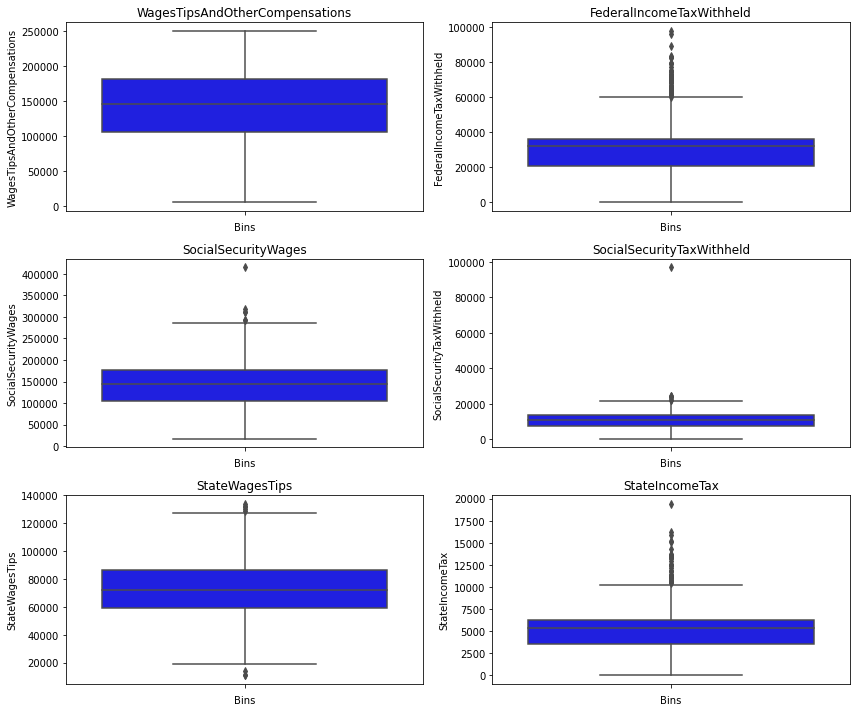

In [22]:
# boxplot
print('\n*** Boxplot ***')
# colNames = numeric.columns.tolist()
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed

for i in range(1, len(num_columns) + 1):
    plt.subplot(3, 2, i)  # 3 rows, 2 columns of subplots
    sns.boxplot(y=train_df[num_columns[i - 1]], color='b')
    plt.title(num_columns[i - 1])
    plt.ylabel(num_columns[i - 1])
    plt.xlabel('Bins')

plt.tight_layout()
plt.show()


We can infer from above plots that outliers lies in  the following columns :
FederalIncomeTaxWithheld , SocialSecurityWages , SocialSecurityTaxWithheld , StateIncomeTax, state Wages tips

We can handle the outliers with the help of Inter Quartile range(IQR)

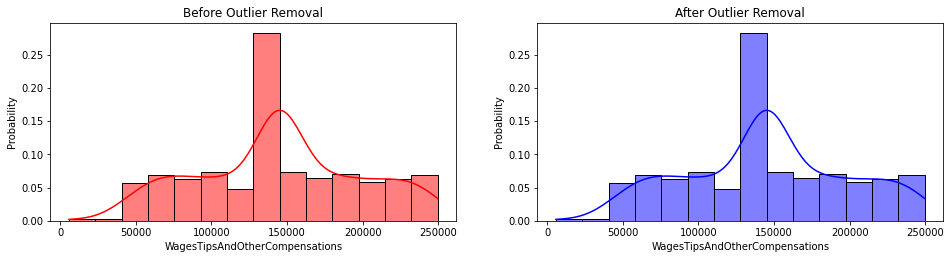

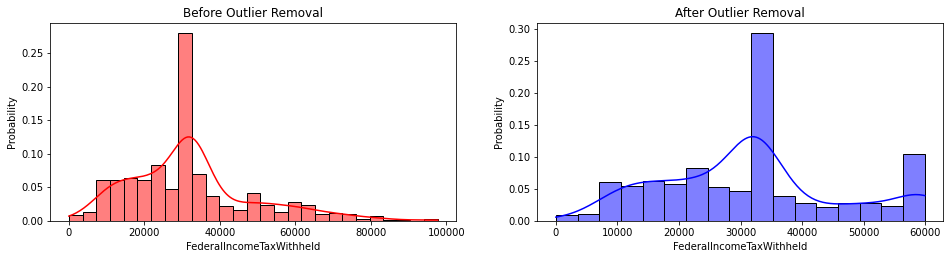

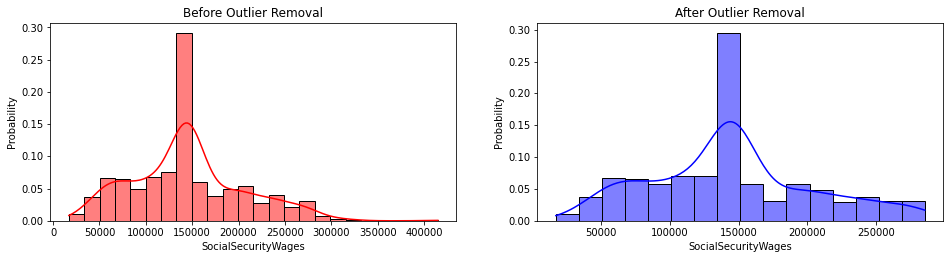

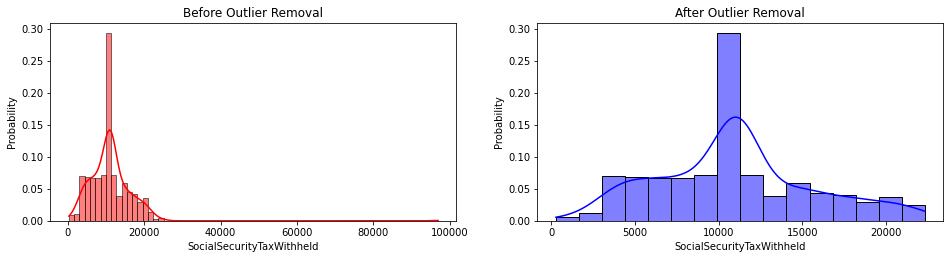

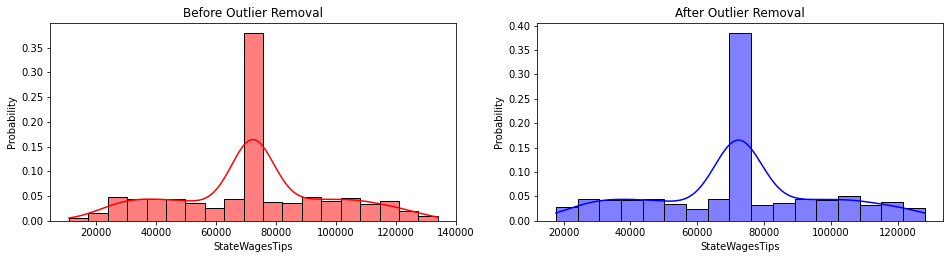

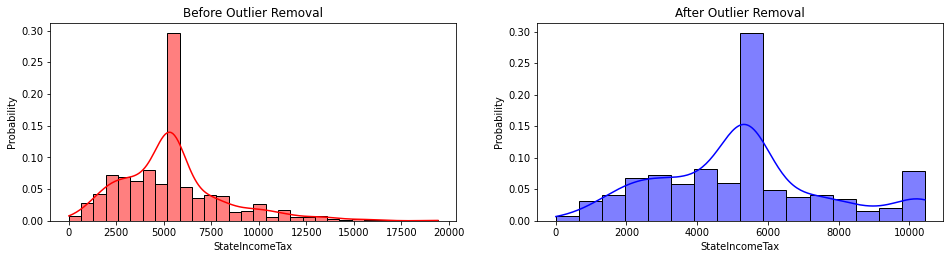

In [23]:
no_outlier_df = train_df.copy()
# col = numeric.columns.tolist()
col = num_columns
def HandleOutlier(dataframe):
    for i in range(len(col)):
        Q1 = dataframe[col[i]].quantile(0.25)
        Q3 = dataframe[col[i]].quantile(0.75)
        iqr =  Q3-Q1
        lower_limit = Q1-1.5*iqr
        upper_limit = Q3 + 1.5*iqr
        dataframe[col[i]] = np.where(
            dataframe[col[i]] > upper_limit,
            upper_limit,
            np.where(
                dataframe[col[i]] < lower_limit,
                lower_limit,
                dataframe[col[i]]
            )
        ) 
        
        plt.figure(figsize=(16,8))
        plt.subplot(2,2,1)
        sns.histplot(train_df[col[i]],kde=True,stat='probability',legend=True,color='r')
        plt.title('Before Outlier Removal')


        plt.subplot(2,2,2)
        sns.histplot(dataframe[col[i]],kde=True,stat='probability',legend=True,color='b')
        plt.title('After Outlier Removal')


        plt.show()
    
    
HandleOutlier(no_outlier_df)

Lets check the co-relation between the features with the help of Correlation Matrix

In [24]:
numeric  = train_df[num_columns]
corr  = numeric.corr()#train_imputed_df.corr()
corr

,WagesTipsAndOtherCompensations,FederalIncomeTaxWithheld,SocialSecurityWages,SocialSecurityTaxWithheld,StateWagesTips,StateIncomeTax
WagesTipsAndOtherCompensations,1.000000,0.675933,0.782204,0.617101,0.821653,0.620925
FederalIncomeTaxWithheld,0.675933,1.000000,0.588723,0.455040,0.621152,0.466928
SocialSecurityWages,0.782204,0.588723,1.000000,0.712385,0.734257,0.579800
SocialSecurityTaxWithheld,0.617101,0.455040,0.712385,1.000000,0.616473,0.464511
StateWagesTips,0.821653,0.621152,0.734257,0.616473,1.000000,0.623107
StateIncomeTax,0.620925,0.466928,0.579800,0.464511,0.623107,1.000000


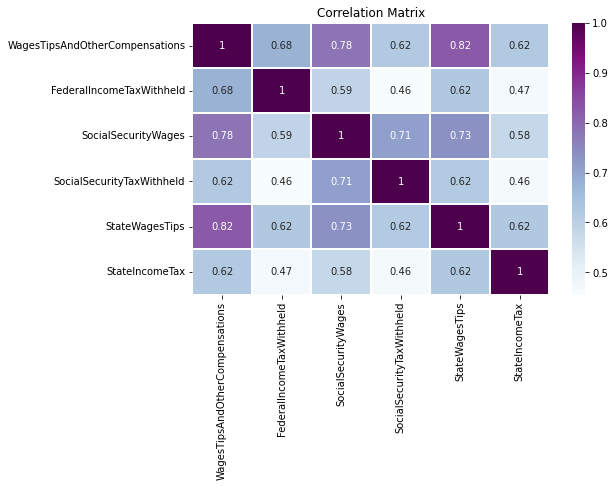

In [25]:
#Visualizing with the help of Heat map
plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True, cmap='BuPu', linewidths=0.3)
plt.title("Correlation Matrix")
plt.show()

Positive Correlation: When the correlation coefficient is close to 1, it indicates a strong positive linear relationship between two variables.This means that as one variable increases, the other tends to increase as well.
For eg: correlation between WagesTipsAndOtherCompensations and StateWagesTips is approximately 0.82 whereas features like  WagesTipsAndOtherCompensations and SocialSecurityWages have correlation 0.78 ,also SocialSecurityWages and StateWagesTips has correlation of 0.73 which indicates a strong positive correlation between these two variables.

All other columns are Moderately positively correlated to each other .

Negative Correlation: When the correlation coefficient is close to -1, it indicates a strong negative linear relationship between two variables.This means that as one variable increases, the other tends to decrease. There are no features which have strong Negative Correlation between them.

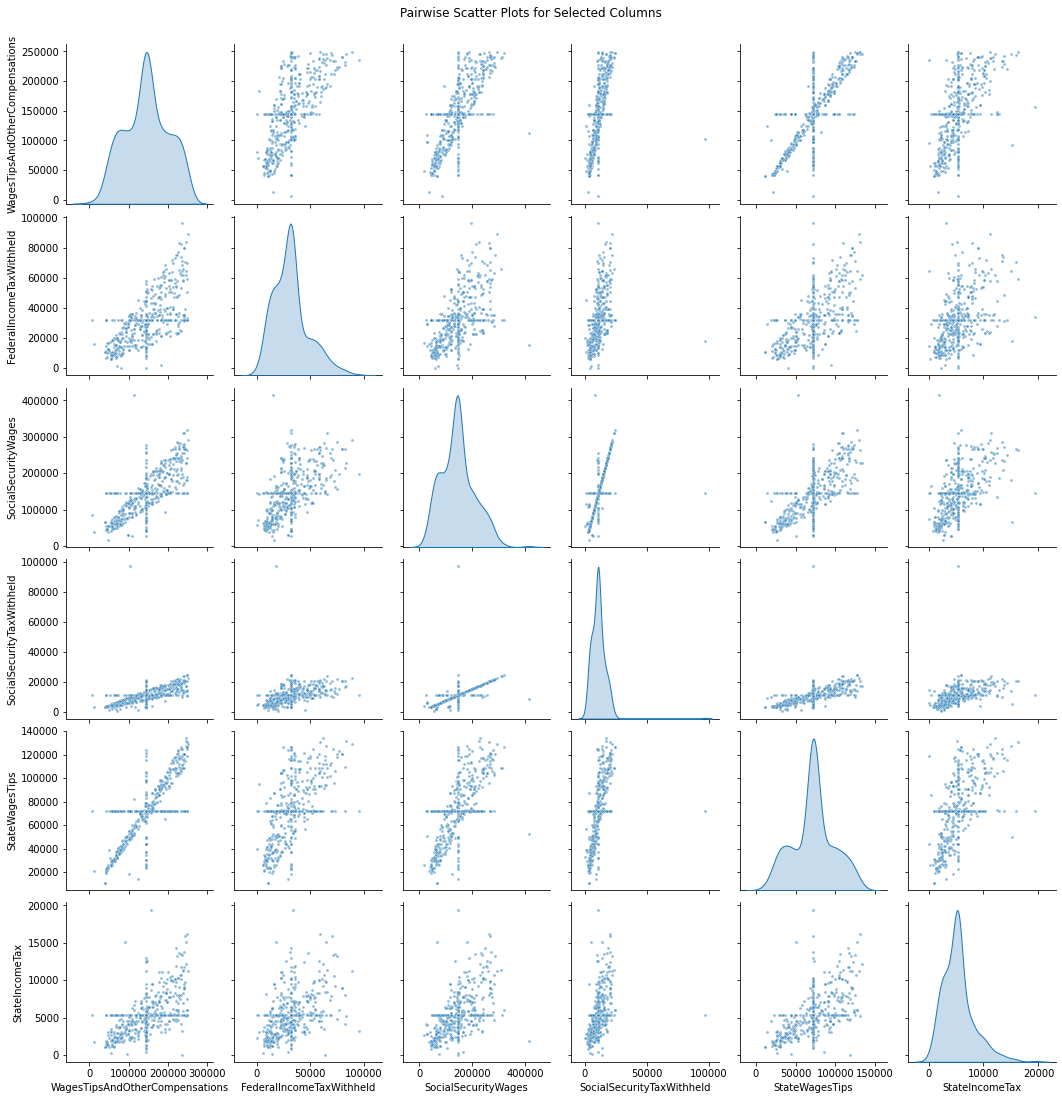

In [47]:


# Create a pairplot for the selected columns
sns.pairplot(train_df[train_df.iloc[:,:-1].columns], diag_kind='kde', markers='.', plot_kws={'alpha':0.5})
plt.suptitle('Pairwise Scatter Plots for Selected Columns', y=1.02)
plt.show()
     


The scatter matrix is like a visual summary of how different numbers in your data are connected. It helps us see if there are any patterns, connections, or unusual things happening between these numbers. The scatter plots show us how two numbers change together, and the diagonal plots show us how each number spreads out on its own. This helps us understand more about our data such as for identifying patterns, correlations, and outliers in the data.

The above scatter plot shows us that there are most of the  columns which have positive relationship between them same as what we saw in correlation matrix.

In [27]:
train_df = train_df.dropna(how='any')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495 entries, 0 to 599
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   employerAddressCity             495 non-null    object 
 1   employerAddressState            495 non-null    object 
 2   WagesTipsAndOtherCompensations  495 non-null    float64
 3   FederalIncomeTaxWithheld        495 non-null    float64
 4   SocialSecurityWages             495 non-null    float64
 5   SocialSecurityTaxWithheld       495 non-null    float64
 6   StateWagesTips                  495 non-null    float64
 7   StateIncomeTax                  495 non-null    float64
 8   taxYear                         495 non-null    float64
dtypes: float64(7), object(2)
memory usage: 38.7+ KB


In [28]:
train_df['employerAddressState'].unique()

array(['NE', 'AK', 'FL', 'FA', 'CT', 'MY', 'CA', 'HI', 'Co', 'WA', 'OK',
       'ID', 'TX', 'IL', 'AR', 'NV', 'WI', 'OH', 'NJ', 'PA', 'NY', 'IA',
       'MO', 'MT', 'ME', 'NM', 'MD', 'MS', 'NC', 'UT', 'WY', 'RI', 'LA',
       'KA', '0', 'MI', 'DE', 'TN', 'VA', 'NH', 'OR', 'GA', 'SD', 'KY',
       'MN', 'KS', 'DC', 'VT', 'NOT', 'MA', 'AL', 'AZ', 'WV', 'SC', 'IN',
       'ND', 'O', '360', 'CO', 'MV', 'wy', 'RE', 'sc', 'V', '10', 'Mo',
       ':'], dtype=object)

In [29]:
# List of values to drop
values_to_drop = ['10', '360', ':']

# Use the ~ operator to select rows where 'employerAddressState' is not in the list of values to drop
train_df = train_df[~train_df['employerAddressState'].isin(values_to_drop)]


In [30]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 0 to 599
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   employerAddressCity             492 non-null    object 
 1   employerAddressState            492 non-null    object 
 2   WagesTipsAndOtherCompensations  492 non-null    float64
 3   FederalIncomeTaxWithheld        492 non-null    float64
 4   SocialSecurityWages             492 non-null    float64
 5   SocialSecurityTaxWithheld       492 non-null    float64
 6   StateWagesTips                  492 non-null    float64
 7   StateIncomeTax                  492 non-null    float64
 8   taxYear                         492 non-null    float64
dtypes: float64(7), object(2)
memory usage: 38.4+ KB


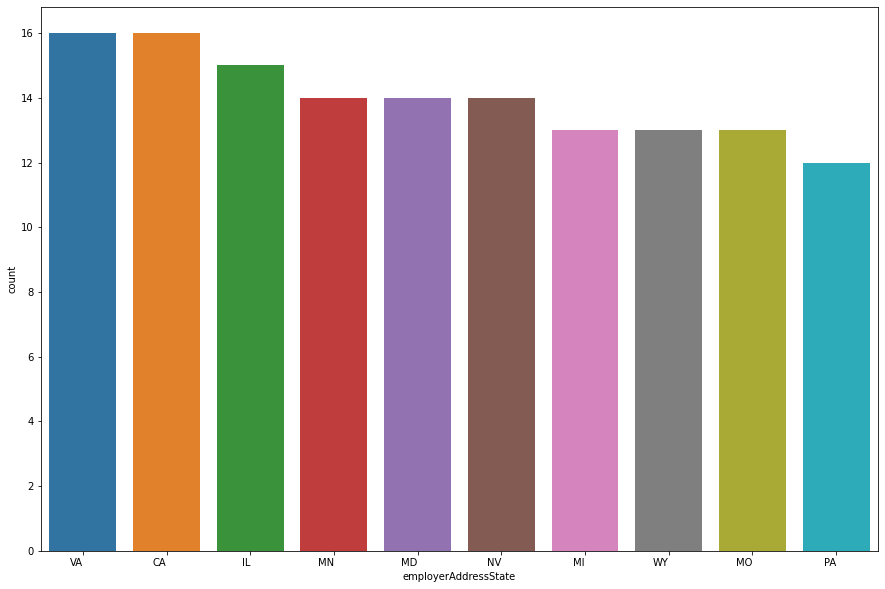

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 10 cities by value counts
top_10_cities = train_df['employerAddressState'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 cities
filtered_df = train_df[train_df['employerAddressState'].isin(top_10_cities)]

# Create a countplot
plt.figure(figsize=(15, 10))
sns.countplot(data=filtered_df, x='employerAddressState', order=top_10_cities)
plt.xticks(ha='right')
plt.show()


VA , CA, IL has the highest numbers.


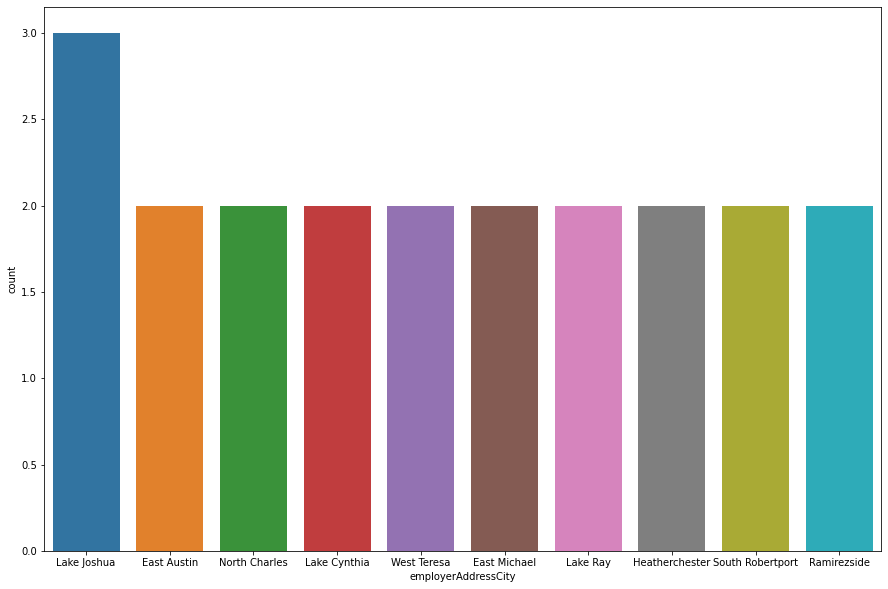

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 10 cities by value counts
top_10_cities = train_df['employerAddressCity'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 cities
filtered_df = train_df[train_df['employerAddressCity'].isin(top_10_cities)]

# Create a countplot
plt.figure(figsize=(15, 10))
sns.countplot(data=filtered_df, x='employerAddressCity', order=top_10_cities)
plt.xticks( ha='center')
plt.show()


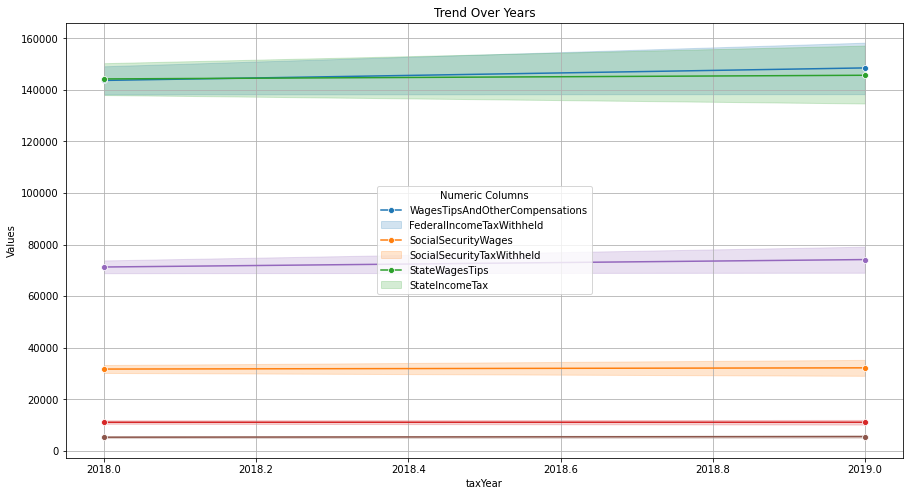

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

train_df['taxYear'] = train_df['taxYear'].astype(int)

# Example: Line plot for 'WagesTipsAndOtherCompensations' by 'taxYear'
plt.figure(figsize=(15, 8))
for i in num_columns:
    sns.lineplot(x=train_df['taxYear'], y=train_df[i], marker='o',legend='auto')
    plt.xlabel('taxYear')
    plt.ylabel('Values')
plt.title('Trend Over Years')

# Add a legend
plt.legend(labels=num_columns, title='Numeric Columns')
plt.grid(True)
plt.show()


In [34]:
#Grouping state column with max values 
# Get the top 20 state by value counts
top_20_state = train_df['employerAddressState'].value_counts().head(20).index
maxstate = train_df.groupby('employerAddressState')[num_columns].max().reset_index()

# Sort the 'maxstate' DataFrame in deplt.legend(labels=num_columns, title='Numeric Columns', loc='upper left')scending order based on 'StateIncomeTax'
top_20_states = maxstate.sort_values(by='StateIncomeTax', ascending=False).head(20)

# Print the top 20 states

top_20_states

,employerAddressState,WagesTipsAndOtherCompensations,FederalIncomeTaxWithheld,SocialSecurityWages,SocialSecurityTaxWithheld,StateWagesTips,StateIncomeTax
21,KY,242842.12,59835.97,265916.06,20419.08,114952.97,19421.53
53,TX,249429.38,71983.53,264285.89,20217.87,130363.08,16188.93
27,MN,243726.91,70369.09,267545.68,20467.24,126297.58,15856.16
41,NV,221260.06,61783.77,223287.32,17081.48,107989.13,15151.41
54,UT,245379.13,64741.62,281540.19,21537.82,127683.58,15089.32
44,OH,240216.54,33660.70,249662.80,19099.21,115767.91,14302.44
56,VA,248557.47,49242.60,270761.69,20713.27,124362.48,13763.03
49,RI,246482.31,61772.03,271211.08,20747.65,134026.29,13659.80
59,WI,233146.90,73449.38,208770.54,17913.85,106270.46,13531.38
3,AR,234405.35,71206.69,236532.35,15786.53,124391.78,13323.12


In [35]:
filtered_df = train_df[train_df['employerAddressState'].isin(top_20_state)]
filtered_df

,employerAddressCity,employerAddressState,WagesTipsAndOtherCompensations,FederalIncomeTaxWithheld,SocialSecurityWages,SocialSecurityTaxWithheld,StateWagesTips,StateIncomeTax,taxYear
7,Smithborough,CA,116883.090000,33295.250000,132853.660000,10163.300000,72361.603358,5387.630201,2018
14,Mcdonaldtown,IL,42469.960000,6869.480000,47787.700000,3655.760000,20894.340000,1920.750000,2019
16,Mistystad,IL,161516.460000,22767.080000,202813.670000,15515.250000,73203.220000,4024.390000,2019
17,West Markshire,NV,166114.550000,36849.560000,206844.320000,15823.590000,90371.020000,5387.630201,2019
19,North Gregory,WI,145072.162821,11263.030000,65424.400000,5004.970000,44379.320000,2325.730000,2019
...,...,...,...,...,...,...,...,...,...
591,Nicolefort,LA,145072.162821,32163.476592,200998.410000,11091.494925,72361.603358,5387.630201,2018
595,Port Davidville,WY,58304.970000,10836.760000,56051.560000,4287.940000,72361.603358,1982.960000,2018
596,West Nathaniel,PA,187638.770000,63800.280000,150473.680000,11511.240000,93928.810000,8385.660000,2018
598,Sandrafort,AL,182042.650000,55164.760000,234196.100000,17916.000000,72361.603358,5387.630201,2018


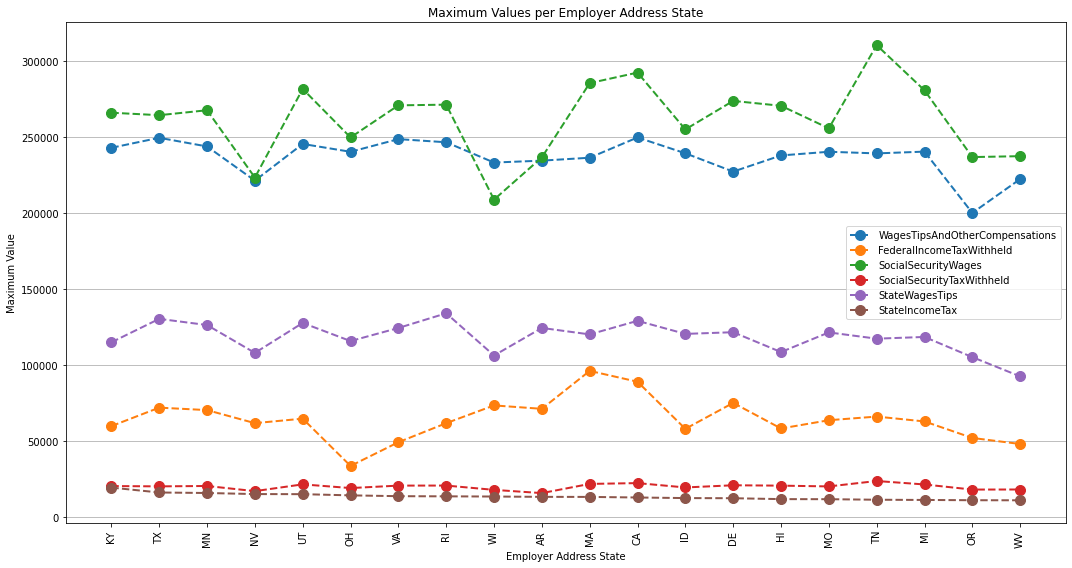

In [46]:
# Plot each numeric column
# Set the figure size
plt.figure(figsize=(15, 8))
for column in num_columns:
    plt.plot(top_20_states['employerAddressState'], top_20_states[column],marker='o',linestyle='dashed' ,linewidth=2, markersize=10,label=column)
    
# Add labels and legend
plt.xlabel('Employer Address State')
plt.ylabel('Maximum Value')
plt.title('Maximum Values per Employer Address State')
plt.legend()

# Show the graph and Rotate x-axis labels for readability
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Social Security wages :
    highest in the state : TN , while lowest in the state : WI 
    
WagesTipsAndOtherCompensations :
    highest in the state : RI , while lowest in the state : OR
 
State Wage tips :
    highest in the state : TN , while lowest in the state : WI 
   
FederalIncomeTaxWithheld :
    highest in the state : MA , while lowest in the state : OH
    
State Income TAx with little bit high in KY ,otherwise it was constant among other state

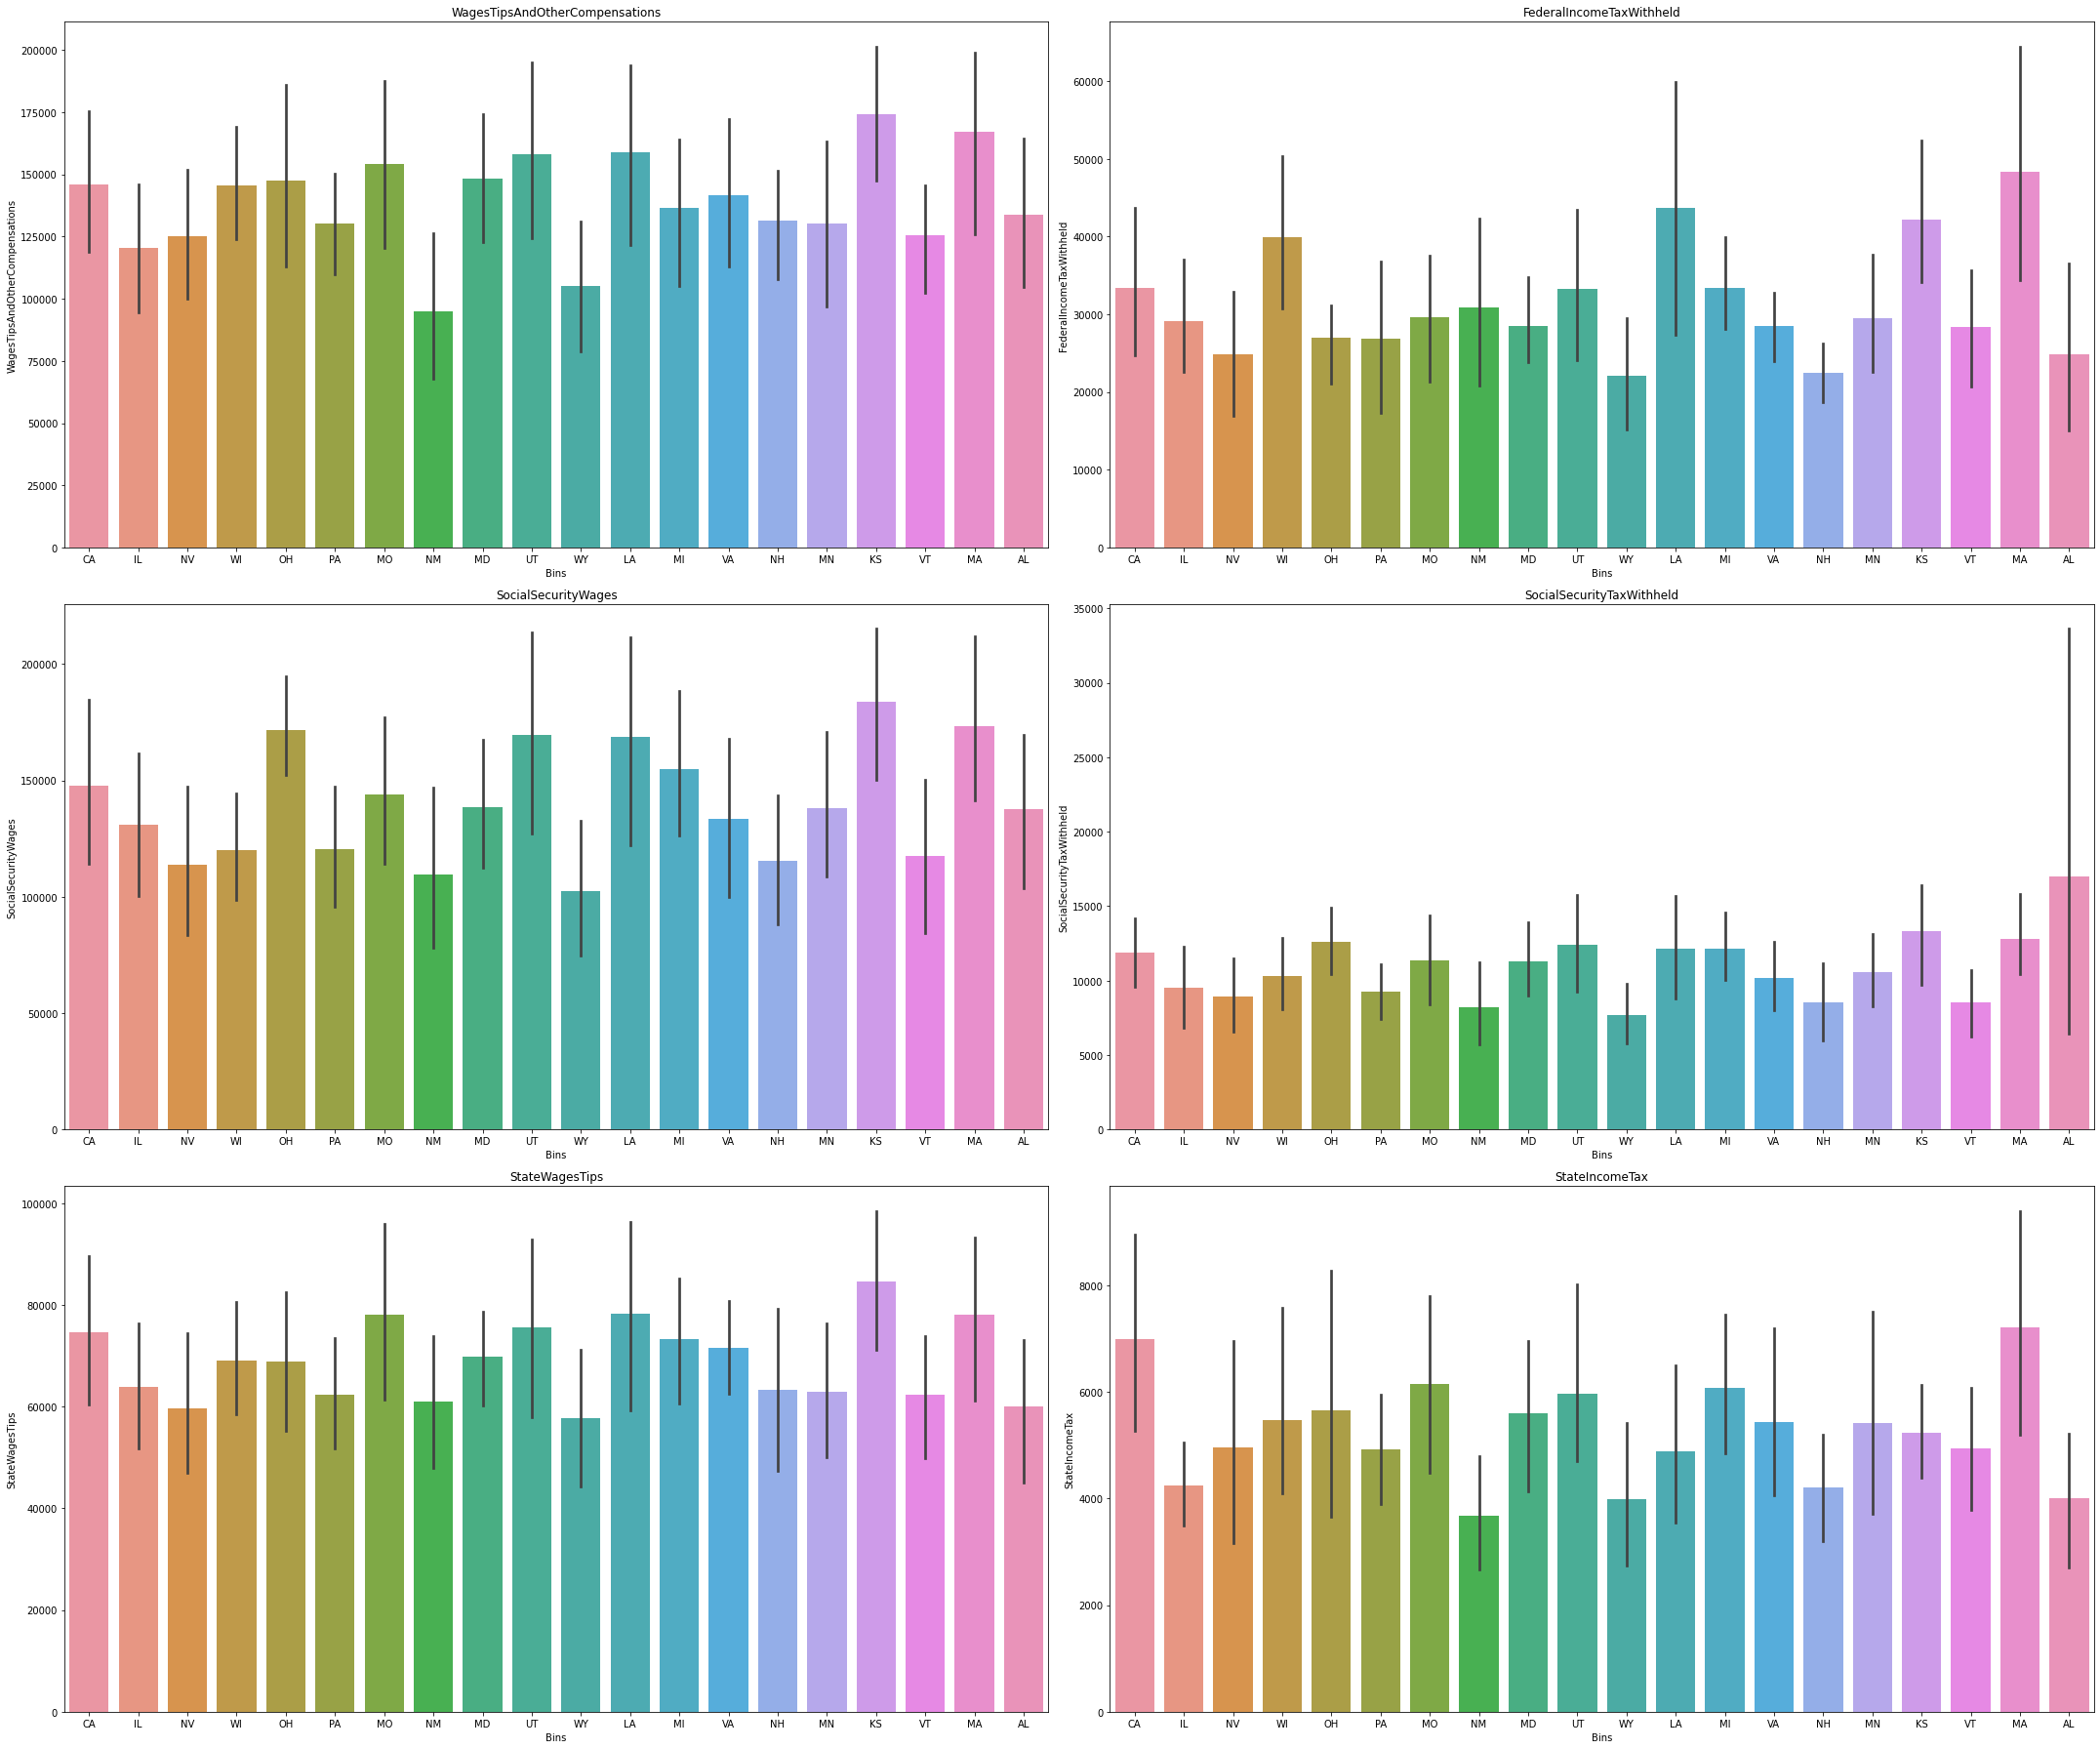

In [37]:
# Plot each numeric column
# Set the figure size
plt.figure(figsize=(30, 25))


for i in range(1, len(num_columns) + 1):
    # Filter the DataFrame to include only the top 10 cities
    filtered_df = train_df[train_df['employerAddressState'].isin(top_20_state)]
    plt.subplot(3,2, i)
    sns.barplot(y=filtered_df[num_columns[i-1]], x=filtered_df['employerAddressState'])
    plt.title(col[i - 1])
    plt.ylabel(col[i - 1])
    plt.xlabel('Bins')

plt.tight_layout()
plt.show()



In [38]:
# Group the DataFrame by 'taxYear' and calculate the maximum for each column within each group
maxtax_year = train_df.groupby('taxYear')[num_columns].max().reset_index()

# Sort the 'maxstate' DataFrame in descending order based on 'StateIncomeTax'
top_10_cities = maxtax_year.sort_values(by='StateIncomeTax', ascending=False).head(10)

top_10_cities

,taxYear,WagesTipsAndOtherCompensations,FederalIncomeTaxWithheld,SocialSecurityWages,SocialSecurityTaxWithheld,StateWagesTips,StateIncomeTax
0,2018,249429.38,96159.02,414913.13,96928.06,131396.69,19421.53
1,2019,249641.71,89023.98,311331.53,23816.86,134026.29,15151.41


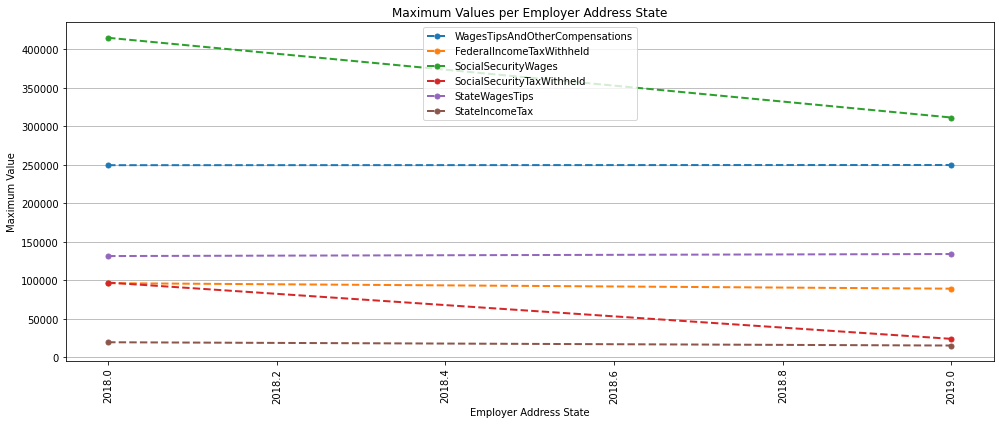

In [39]:
# Set the figure size
plt.figure(figsize=(14, 6))

for column in num_columns:
    plt.plot(top_10_cities['taxYear'], top_10_cities[column], marker='o',linestyle='dashed' ,linewidth=2, markersize=5,label=column)
    
# Add labels and legend
plt.xlabel('Employer Address State')
plt.ylabel('Maximum Value')
plt.title('Maximum Values per Employer Address State')
plt.legend()

# Show the graph and Rotate x-axis labels for readability
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Values of Social Security wages and Social Securtiy Tax with held has decresased in 2019 as compared to 2018

Lets visualize state income tax in both the years.

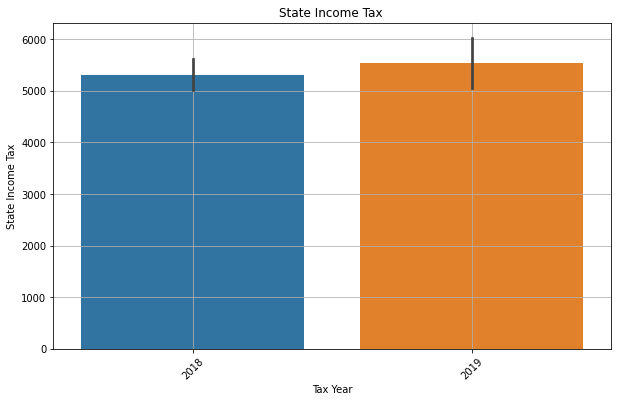

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'train_df'
plt.figure(figsize=(10, 6))
sns.barplot(data=train_df, x='taxYear', y='StateIncomeTax')
plt.xlabel('Tax Year')
plt.ylabel('State Income Tax')
plt.title('State Income Tax ')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


State income tax was bit high in the year 2019 as compared to the year 2018